In [27]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
import chess.pgn
import io

In [28]:
N = 100000

path = '../../dados/experimentos/chess_games.csv'
df = pd.read_csv(path, nrows=N)


In [29]:
move_density = pd.DataFrame({"move_number":[i//8 for i in range(8*20)]})

files = ['a','b','c','d','e','f','g','h']
move_density[files] = 0

# moves_string = (
#     "1. d4 d5 2. c4 c6 3. e3 a6 4. Nf3 e5 5. cxd5 e4 6. Ne5 cxd5 7. Qa4+ Bd7 "
#     "8. Nxd7 Nxd7 9. Nc3 Nf6 10. Qb3 Be7 11. Nxd5 Qa5+ 12. Nc3 O-O 13. Be2 b5 "
#     "14. O-O Rad8 15. Bd2 Qc7 16. Rac1 Qd6 17. Qc2 Qe6 18. Nb1 Bd6 19. a3 Nb6 "
#     "20. Qc6 Nfd5 21. Ba5 Rc8 22. Qb7 Qh6 23. h3 Nc4 24. Bxc4 bxc4 25. Qxd5 Rfd8 "
#     "26. Qxe4 Rd7 27. Bc3 Re7 28. Qf3 Re6 29. Nd2 Rf6 30. Qg4 Re8 31. Ne4 Rg6 "
#     "32. Qd7 Rf8 33. Nxd6 Rxd6 34. Qc7 Rg6 35. Qh2 Re8 36. d5 f6 37. d6 Rd8 38. Rfd1 1-0"
# )

for moves_string in df['AN']:
    # if 'eval' in moves_string:
    #     continue
    # m = moves_string.split(' ')
    # s = ''
    # while len(m):
    #     s = ' '.join([s] + m[:18])
    #     del m[:18]
    #     s = s + ' \n'
    # moves_string = s
    pgn_data = f"""
[Event "????????"]
[Site "????"]
[Date "2024.09.09"]
[Round "1"]
[White "?????"]
[Black "?????"]
[Result "???"]

{moves_string}
"""
    # print(pgn_data)

    pgn = io.StringIO(pgn_data)

    # print(pgn.getvalue())
    game = chess.pgn.read_game(pgn)
    # print(game)

    # if game is None:
    #     print("Failed to read the PGN game.")
    # else:
    #     print("PGN game read successfully.")
        # print(game.mainline_moves())
    # Create the move tree
    for i, move in enumerate(game.mainline_moves()):
        # print(move.uci())
        if i >= 20:
            break
        n = move.to_square
        file = n % 8
        rank = n // 8
        move_density.loc[i*8+rank,files[file]] += (-1)**(i%2+1)

k= N/100
move_density[files] = move_density[files]/k

move_density.head(8)

,move_number,a,b,c,d,e,f,g,h
0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,0,-0.101,-1.225,-1.058,-0.956,-2.396,-3.961,-1.621,-0.098
3,0,-0.061,-0.577,-3.264,-24.673,-58.625,-1.037,-0.246,-0.101
4,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
7,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [32]:
move_density.to_csv('../../dados/experimentos/move_density.csv',index=False)

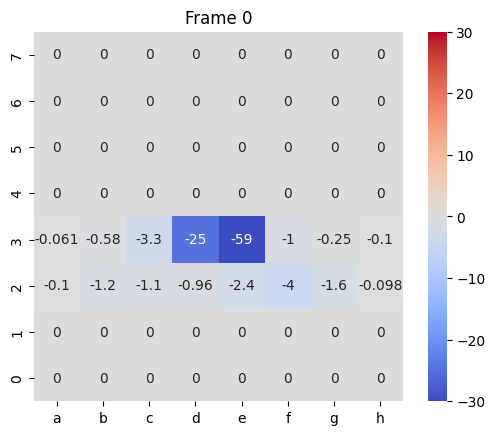

In [31]:
def generate_data(frame):
    data = move_density.loc[move_density['move_number'] == frame, files].reset_index()
    data = data.iloc[::-1]
    return data

lim = 0.3 * 100

fig, ax = plt.subplots()
heatmap = sns.heatmap(np.zeros((8, 8)), ax=ax, square=True, vmax=lim, vmin=-lim, cmap='coolwarm')

def update(frame):
    data = generate_data(frame)
    ax.cla()
    heatmap = sns.heatmap(data[files], annot=True, yticklabels=data.index, ax=ax, cbar=False, square=True, vmax=lim, vmin=-lim, cmap='coolwarm')
    ax.set_title(f"Frame {frame}")
    return heatmap,

ani = animation.FuncAnimation(
    fig, update, frames=19
)

# plt.show()
ani.save('heatmap_animation.gif', writer='pillow', fps=0.5)


# animation.save('poly.gif', writer='imagemagick', fps=20); # needs the imagemagick library, can be installed with !apt install imagemagick
# animation.save('animation.mp4', writer='ffmpeg', fps=20);
# HTML(ani.to_jshtml())
